In [240]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook purpose: Explorar ideas en base a los datos, familiarizarse con estos. Poder ir explorando ideas que van surgiendo durante el analisis. No necesariamente se sigue un orden claro. Estas ideas luego son aterrizadas de mejor manera en una siguiente versión. 

# Carga de la base de datos

**Importante:** El orden de redacción sigue la lógica de que primero se presenta la hipotesis/instrucción a investigar/realizar. Luego, se presenta lo que se observa de hipotesis/instrucción realizada.

In [241]:
# set paths
main_path = os.path.dirname(os.getcwd())
data_path = os.path.join(main_path, "data", "dataset_SCL.csv")
df = pd.read_csv(data_path)

C:\Users\diria\AppData\Local\Temp\ipykernel_10860\1169743063.py:4: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Se carga el dataframe

# Análisis preliminar

Al cargar la base de datos, notamos que algo pasa con la columna 1 y 6.

Notamos que algo pasa con las columnas 1 y 6.

Se analiza la dimensión y características del df

In [242]:
df.shape

(68206, 18)

Se tienen 68206 y 18 columnas

In [243]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [244]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


Notamos que en la columna 1 y 6, las variables aveces estan como string y aveces como float. Se transforma las variables a string de manera completa. Esto dado que si bien la variable es numerica, en verdad representa una categoria. Un vuelo con un codigo 200, no tiene una unidad menos de algo que un vuelo con codigo 201. Esos numeros solo representan vuelos distintos (distintas categorias). 

Observacion: Antes de transformarse a enteros, me fije que los numeros del tipo 400.X, solo tuvieran un 0 despues del punto, por lo que la categoria 400 es igual a la 400.0.

In [245]:
def float_to_str(x):
    if type(x) == type(2.) and not np.isnan(x):
        return str(float(x))
    return x

In [246]:
df["Vlo-I"] = df["Vlo-I"].apply(lambda x: float_to_str(x))
df["Vlo-O"] = df["Vlo-O"].apply(lambda x: float_to_str(x))

Información preliminar

Cada entrada del df representa un vuelo. Se tienen información de cerca de 68_000 vuelos. Cada vuelo presenta 18 caracteristicas:

Section 1: Scheduled information of the flight
| Field | Description |
| --- | --- |
| Fecha-I | Scheduled date and time of the flight. |
| Vlo-I | Scheduled flight number. |
| Ori-I | Programmed origin city code. |
| Des-I | Programmed destination city code. |
| Emp-I | Scheduled flight airline code. |


Section 2: Real operated information of the flight
| Field | Description |
| --- | --- |
| Fecha-O | Date and time of flight operation. |
| Vlo-O | Flight operation number of the flight. |
| Ori-O | Operation origin city code. |
| Des-O | Operation destination city code. |
| Emp-O | Airline code of the operated flight. |

Section 3: Dates of flight operation
| Field | Description |
| --- | --- |
| DIA | Day of the month of flight operation. |
| MES | Number of the month of operation of the flight. |
| AÑO | Year of flight operation. |
| DIANOM | Day of the week of flight operation. |

Section 4: Type of the flight
| Field | Description |
| --- | --- |
| TIPOVUELO | Type of flight, I =International, N =National. |

Section 5: Name of codes used in previous sections
| Field | Description |
| --- | --- |
| OPERA | Name of the airline that operates. |
| SIGLAORI | Name city of origin. |
| SIGLADES | Destination city name. |

Como las variables de seccion 5 son solo el nombre de otros códigos, me interesa guardarlas como diccionarios, dado que probablemente no serán consideradas en el análisis de calculo de probabilidad. 

Observacion: revisé que esa sección corresponde con como operó el vuelo. No con lo scheduled.

In [265]:
airline_name = df.set_index('Emp-O')['OPERA'].to_dict()
origin_name = df.set_index('Ori-O')['SIGLAORI'].to_dict()
destiination_name = df.set_index('Des-O')['SIGLADES'].to_dict()

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Se observa que la mayoria de las variables han sido cargadas como categorias. En particular se observa que las columnas de fechas no tienen el formato de fecha. El resto de las variables se mantiene como categorias.

In [249]:
# convert dates to datetime format
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

A continuación se analiza si es que existen datos faltantes en alguna variable

In [250]:
df.isnull().sum()/df.shape[0]*100

Fecha-I      0.000000
Vlo-I        0.000000
Ori-I        0.000000
Des-I        0.000000
Emp-I        0.000000
Fecha-O      0.000000
Vlo-O        0.001466
Ori-O        0.000000
Des-O        0.000000
Emp-O        0.000000
DIA          0.000000
MES          0.000000
AÑO          0.000000
DIANOM       0.000000
TIPOVUELO    0.000000
OPERA        0.000000
SIGLAORI     0.000000
SIGLADES     0.000000
dtype: float64

Solo existen datos faltantes en la variable Vlo-O. Profundizamos en esto.

In [251]:
# create a boolean mask for missing values
mask = df.isna().any(axis=1)

# select the rows with missing values
rows_with_missing = df[mask]
rows_with_missing

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Estudiamos cuantos vuelos tienen el mismo Vlo-I que Vlo-O.

In [252]:
np.sum(df["Vlo-I"] == df["Vlo-O"])/len(df)

0.9337448318329765

In [253]:
df[df["Vlo-I"]  == "200"]["Vlo-O"].unique()

array(['200', nan], dtype=object)

Es intereseante notar que cada vez que el Vlo-I es "200", entonces también lo es Vlo-O. Por lo que se reemplaza "200" en el único valor faltante.

Idea: se me ocurre de acá es estudiar que pasa cuando esos códigos son distintos, que es tan solo el 7% de los casos.

In [254]:
df.fillna("200", inplace=True)

Ahora, notamos que no existen dos cosas:
- Si un vuelo despega o aterriza
- Si un vuelo se retraso

Investiguemos

In [255]:
df["SIGLAORI"].unique()

array(['Santiago'], dtype=object)

In [256]:
df["SIGLADES"].unique()

array(['Miami', 'Dallas', 'Buenos Aires', 'Toronto', 'Paris',
       'Ciudad de Mexico', 'Bogota', 'Roma', 'Londres',
       'Ciudad de Panama', 'Atlanta', 'Sao Paulo', 'Rio de Janeiro',
       'Florianapolis', 'Madrid', 'Lima', 'Sydney', 'Houston', 'Asuncion',
       'Cataratas Iguacu', 'Puerto Montt', 'Punta Arenas',
       'Puerto Natales', 'Balmaceda', 'Temuco', 'Valdivia', 'Concepcion',
       'La Serena', 'Copiapo', 'Calama', 'Antofagasta', 'Iquique',
       'Arica', 'Mendoza', 'Cordoba', 'Montevideo', 'Castro (Chiloe)',
       'Osorno', 'Orlando', 'Nueva York', 'Guayaquil', 'Cancun',
       'Punta Cana', 'Los Angeles', 'Auckland N.Z.', 'Isla de Pascua',
       'La Paz', 'Santa Cruz', 'Curitiba, Bra.', 'Quito', 'Bariloche',
       'Rosario', 'Washington', 'Tucuman', 'Melbourne', 'San Juan, Arg.',
       'Neuquen', 'Pisco, Peru', 'Ushuia', 'Puerto Stanley',
       'Punta del Este', 'Cochabamba'], dtype=object)

Notamos que los vuelos solo despegan desde Santiago, pero ninguno llega a Santiago, por lo que se estimará la probabilidad de que un vuelo que despuegue de Santiago se retrase.

Estudiemos cuantos vuelos salen sin atrasarse.

In [263]:
np.sum(df["Fecha-I"] <= df["Fecha-O"])/len(df)

0.7374131308096062

Notamos que el 73% de los vuelos no se retrasa.

Ahora, creamos una variable que guarde en minutos cuanto un vuelo se adelanto/retraso en despegar.

In [258]:
df['min_diff'] = df.apply(lambda x: (x['Fecha-O'] - x['Fecha-I']).total_seconds() / 60, axis=1)

Visualisemos esa información

C:\Users\diria\AppData\Local\Temp\ipykernel_10860\2149546919.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['min_diff'], shade=True)


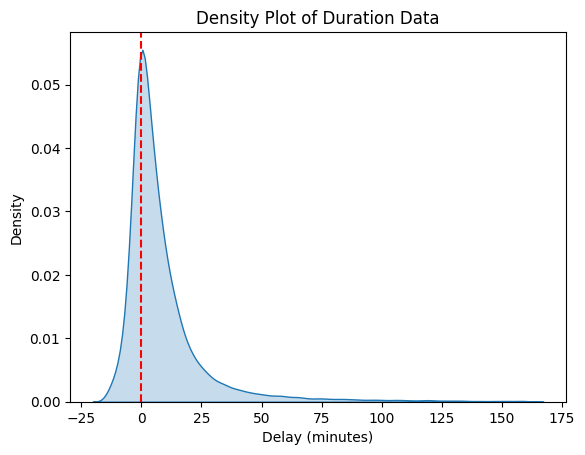

In [261]:
# create a density plot
sns.kdeplot(df['min_diff'], shade=True)

# add labels and title
plt.xlabel('Delay (minutes)')
plt.ylabel('Density')
plt.title('Density Plot of Duration Data')
plt.axvline(x=0, color='red', linestyle='--')

# show the plot
plt.show()

Otras ideas:

    - Revisar si hay rutas constantes, y su taza de retraso.
    - Pregunta: Esto lo realizo entre lo -I o lo -O.
    - Revisar que pasa cuando hay cambio entre lo -I o lo -O en otras variables.